<a href="https://colab.research.google.com/github/NBK-code/Demonstrations/blob/main/VGG_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Neccessary Libraries

In [4]:
import numpy as np
import cv2
import PIL
import PIL.Image as Image
import os

import matplotlib.pylab as plt

from tensorflow import keras
import tensorflow as tf

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Sequential

#Download Flowers Data

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='/content/sample_data', untar=True)

228827136/228813984 [==============================] - 1s 0us/step


In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/sample_data/datasets/flower_photos')

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
roses = list(data_dir.glob('roses/*'))

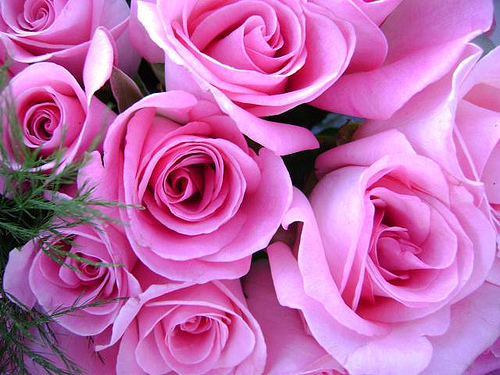

In [10]:
PIL.Image.open(str(roses[20]))

#Create Train, Test Set

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
X_train_scaled.shape

(2752, 224, 224, 3)

#Build Model

In [18]:
vgg16 = VGG16(input_shape = (224,224,3) , weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [19]:
for layer in vgg16.layers:
    layer.trainable = False

In [26]:
x = Flatten()(vgg16.output)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction)

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  optimizer='adam',
  metrics=['accuracy']
)

#Train Model

In [29]:
r = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

Epoch 1/10
86/86 [==============================] - 10s 111ms/step - loss: 0.8491 - accuracy: 0.7071 - val_loss: 0.5406 - val_accuracy: 0.8050
Epoch 2/10
86/86 [==============================] - 9s 104ms/step - loss: 0.2520 - accuracy: 0.9251 - val_loss: 0.4590 - val_accuracy: 0.8279
Epoch 3/10
86/86 [==============================] - 9s 104ms/step - loss: 0.1234 - accuracy: 0.9764 - val_loss: 0.4776 - val_accuracy: 0.8366
Epoch 4/10
86/86 [==============================] - 9s 104ms/step - loss: 0.0735 - accuracy: 0.9938 - val_loss: 0.4437 - val_accuracy: 0.8562
Epoch 5/10
86/86 [==============================] - 9s 104ms/step - loss: 0.0446 - accuracy: 0.9989 - val_loss: 0.4464 - val_accuracy: 0.8486
Epoch 6/10
86/86 [==============================] - 9s 104ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 0.4657 - val_accuracy: 0.8442
Epoch 7/10
86/86 [==============================] - 9s 104ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.4514 - val_accuracy: 0.8508
Epoch

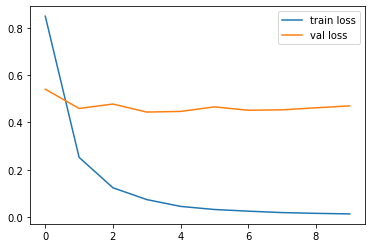

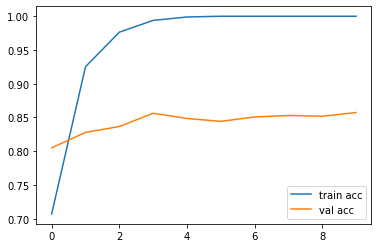

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#Evaluate Model

In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 78ms/step - loss: 0.4698 - accuracy: 0.8573


[0.4698362946510315, 0.8572984933853149]